TEAM MEMBERS:

Anand Chathananickal Sajeevan  -         C0928396

Jobina Joy       -                       C0924759

Jeffin Kochurani Ravi    -               C0925106

Abhishek Mungath        -                C0928517

In [34]:
# Importing essential libraries for data manipulation and analysis
import pandas as pd  # for data manipulation and analysis
import numpy as np  # for numerical computations

# Importing libraries for data visualization
import seaborn as sns  # for statistical data visualization
import matplotlib.pyplot as plt  # for plotting graphs

# Importing libraries from scikit-learn for machine learning tasks
from sklearn.model_selection import train_test_split  # for splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # for linear regression modeling
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # for feature scaling and encoding categorical features
from sklearn.compose import ColumnTransformer  # for applying different preprocessing steps to different features
from sklearn.pipeline import Pipeline  # for creating a machine learning pipeline
from sklearn.metrics import mean_squared_error, r2_score  # for evaluating regression models
from sklearn.linear_model import ElasticNet  # for Elastic Net regression modeling
from sklearn.linear_model import Ridge  # for Ridge regression modeling
from sklearn.linear_model import Lasso  # for Lasso regression modeling

# Importing additional libraries for plotting and preprocessing
import matplotlib.pyplot as plt  # for plotting graphs (repeated import, can be removed)
from sklearn.preprocessing import LabelEncoder  # for encoding categorical labels
from sklearn.compose import ColumnTransformer  # for applying different preprocessing steps to different features (repeated import, can be removed)
from scipy.sparse import csr_matrix  # for creating sparse matrices
from sklearn.preprocessing import StandardScaler  # for feature scaling (repeated import, can be removed)
import joblib

In [35]:
# Reading CSV files containing sales, product, and store data into DataFrames
df_sale = pd.read_csv("D:\\JOBINA\\Global_Electronics_Retailer\\Sales.csv")
df_product = pd.read_csv("D:\\JOBINA\\Global_Electronics_Retailer\\Products.csv")
df_store = pd.read_csv("D:\\JOBINA\\Global_Electronics_Retailer\\Stores.csv")

# Reading the customer data CSV file into a DataFrame with specific encoding to handle special characters
df_customer = pd.read_csv("D:\\JOBINA\\Global_Electronics_Retailer\\Customers.csv", encoding='latin1')

# Renaming columns in the customer and store DataFrames for clarity and consistency
df_customer.rename(columns={'State': 'Customer State'}, inplace=True)
df_store.rename(columns={'State': 'Store State'}, inplace=True)
df_customer.rename(columns={'Country': 'Customer Country'}, inplace=True)
df_store.rename(columns={'Country': 'Store Country'}, inplace=True)

# Displaying the first few rows of the customer DataFrame to verify the changes
print(df_customer.head())

   CustomerKey  Gender               Name            City State Code  \
0          301  Female      Lilly Harding  WANDEARAH EAST         SA   
1          325  Female       Madison Hull      MOUNT BUDD         WA   
2          554  Female      Claire Ferres       WINJALLOK        VIC   
3          786    Male  Jai Poltpalingada    MIDDLE RIVER         SA   
4         1042    Male    Aidan Pankhurst   TAWONGA SOUTH        VIC   

      Customer State Zip Code Customer Country  Continent    Birthday  
0    South Australia     5523        Australia  Australia    7/3/1939  
1  Western Australia     6522        Australia  Australia   9/27/1979  
2           Victoria     3380        Australia  Australia   5/26/1947  
3    South Australia     5223        Australia  Australia   9/17/1957  
4           Victoria     3698        Australia  Australia  11/19/1965  


In [36]:
# Merging the sales and product DataFrames on 'ProductKey' using an outer join
df = pd.merge(df_sale, df_product, on='ProductKey', how='outer')

# Merging the resulting DataFrame with the customer DataFrame on 'CustomerKey' using an outer join
df = pd.merge(df, df_customer, on='CustomerKey', how='outer')

# Merging the resulting DataFrame with the store DataFrame on 'StoreKey' using an outer join
df = pd.merge(df, df_store, on='StoreKey', how='outer')

# Displaying the first few rows of the final merged DataFrame to verify the results
df.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,...,State Code,Customer State,Zip Code,Customer Country,Continent,Birthday,Store Country,Store State,Square Meters,Open Date
0,1776007.0,1.0,11/11/2019,11/13/2019,301.0,0.0,53.0,2.0,AUD,WWI 4GB Video Recording Pen X200 Black,...,SA,South Australia,5523,Australia,Australia,7/3/1939,Online,Online,NaN,1/1/2010
1,1830002.0,1.0,1/4/2020,1/8/2020,325.0,0.0,715.0,1.0,AUD,Proseware Duplex Scanner M200 White,...,WA,Western Australia,6522,Australia,Australia,9/27/1979,Online,Online,NaN,1/1/2010
2,1830002.0,2.0,1/4/2020,1/8/2020,325.0,0.0,731.0,1.0,AUD,Proseware Ink Jet Wireless All-In-One Printer ...,...,WA,Western Australia,6522,Australia,Australia,9/27/1979,Online,Online,NaN,1/1/2010
3,1830002.0,5.0,1/4/2020,1/8/2020,325.0,0.0,1068.0,1.0,AUD,A. Datum SLR Camera X141 Blue,...,WA,Western Australia,6522,Australia,Australia,9/27/1979,Online,Online,NaN,1/1/2010
4,1830002.0,3.0,1/4/2020,1/8/2020,325.0,0.0,1698.0,3.0,AUD,SV Hand Games for students E40 Red,...,WA,Western Australia,6522,Australia,Australia,9/27/1979,Online,Online,NaN,1/1/2010


In [37]:
# Displaying information about the DataFrame such as the number of non-null entries and data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66297 entries, 0 to 66296
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order Number      62884 non-null  float64
 1   Line Item         62884 non-null  float64
 2   Order Date        62884 non-null  object 
 3   Delivery Date     13165 non-null  object 
 4   CustomerKey       66263 non-null  float64
 5   StoreKey          62893 non-null  float64
 6   ProductKey        62909 non-null  float64
 7   Quantity          62884 non-null  float64
 8   Currency Code     62884 non-null  object 
 9   Product Name      62909 non-null  object 
 10  Brand             62909 non-null  object 
 11  Color             62909 non-null  object 
 12  Unit Cost USD     62909 non-null  object 
 13  Unit Price USD    62909 non-null  object 
 14  SubcategoryKey    62909 non-null  float64
 15  Subcategory       62909 non-null  object 
 16  CategoryKey       62909 non-null  float6

In [38]:
# Performing descriptive analysis on the numeric columns of the DataFrame
df.describe()

,Order Number,Line Item,CustomerKey,StoreKey,ProductKey,Quantity,SubcategoryKey,CategoryKey,Square Meters
count,6.288400e+04,62884.000000,6.626300e+04,62893.000000,62909.000000,62884.000000,62909.000000,62909.000000,49728.000000
mean,1.430905e+06,2.164207,1.165715e+06,31.802315,1126.272648,3.144790,450.329969,4.470918,1594.410795
std,4.532963e+05,1.365170,5.917445e+05,22.977937,709.449933,2.256371,212.784012,2.133396,461.788545
min,3.660000e+05,1.000000,3.010000e+02,0.000000,1.000000,1.000000,101.000000,1.000000,245.000000
25%,1.121017e+06,1.000000,6.468710e+05,8.000000,437.000000,1.000000,303.000000,3.000000,1260.000000
50%,1.498016e+06,2.000000,1.245877e+06,37.000000,1359.000000,2.000000,501.000000,5.000000,1715.000000
75%,1.788010e+06,3.000000,1.677766e+06,53.000000,1650.000000,4.000000,602.000000,6.000000,2000.000000
max,2.243032e+06,7.000000,2.099937e+06,66.000000,2517.000000,10.000000,808.000000,8.000000,2105.000000


In [39]:
# Dropping unnecessary columns from the DataFrame
df = df.drop(columns=['Square Meters', 'Subcategory', 'SubcategoryKey', 'Zip Code', 'CustomerKey', 'StoreKey', 'ProductKey', 'CategoryKey'])

# Displaying the first few rows of the modified DataFrame to verify the changes
df.head()

,Order Number,Line Item,Order Date,Delivery Date,Quantity,Currency Code,Product Name,Brand,Color,Unit Cost USD,...,Name,City,State Code,Customer State,Customer Country,Continent,Birthday,Store Country,Store State,Open Date
0,1776007.0,1.0,11/11/2019,11/13/2019,2.0,AUD,WWI 4GB Video Recording Pen X200 Black,Wide World Importers,Black,$98.07,...,Lilly Harding,WANDEARAH EAST,SA,South Australia,Australia,Australia,7/3/1939,Online,Online,1/1/2010
1,1830002.0,1.0,1/4/2020,1/8/2020,1.0,AUD,Proseware Duplex Scanner M200 White,Proseware,White,$68.52,...,Madison Hull,MOUNT BUDD,WA,Western Australia,Australia,Australia,9/27/1979,Online,Online,1/1/2010
2,1830002.0,2.0,1/4/2020,1/8/2020,1.0,AUD,Proseware Ink Jet Wireless All-In-One Printer ...,Proseware,Green,$59.32,...,Madison Hull,MOUNT BUDD,WA,Western Australia,Australia,Australia,9/27/1979,Online,Online,1/1/2010
3,1830002.0,5.0,1/4/2020,1/8/2020,1.0,AUD,A. Datum SLR Camera X141 Blue,A. Datum,Blue,$141.47,...,Madison Hull,MOUNT BUDD,WA,Western Australia,Australia,Australia,9/27/1979,Online,Online,1/1/2010
4,1830002.0,3.0,1/4/2020,1/8/2020,3.0,AUD,SV Hand Games for students E40 Red,Southridge Video,Red,$3.56,...,Madison Hull,MOUNT BUDD,WA,Western Australia,Australia,Australia,9/27/1979,Online,Online,1/1/2010


In [40]:
# Checking for null values in the DataFrame and sorting them in descending order
null_counts = df.isnull().sum().sort_values(ascending=False)

# Displaying the sorted null value counts
print(null_counts)

Delivery Date       53132
Order Number         3413
Line Item            3413
Order Date           3413
Quantity             3413
Currency Code        3413
Store State          3404
Store Country        3404
Open Date            3404
Unit Cost USD        3388
Unit Price USD       3388
Color                3388
Brand                3388
Product Name         3388
Category             3388
State Code             65
Gender                 34
Name                   34
City                   34
Customer State         34
Customer Country       34
Continent              34
Birthday               34
dtype: int64


In [41]:
# Dropping rows where the 'Order Number' column has missing values
df.dropna(subset=['Order Number'], inplace=True)

# Checking for remaining null values in the DataFrame and sorting them in descending order
null_counts_after_drop = df.isnull().sum().sort_values(ascending=False)

# Displaying the sorted null value counts after dropping rows with missing 'Order Number'
print(null_counts_after_drop)

Delivery Date       49719
State Code             30
Order Number            0
Gender                  0
Store State             0
Store Country           0
Birthday                0
Continent               0
Customer Country        0
Customer State          0
City                    0
Name                    0
Category                0
Line Item               0
Unit Price USD          0
Unit Cost USD           0
Color                   0
Brand                   0
Product Name            0
Currency Code           0
Quantity                0
Order Date              0
Open Date               0
dtype: int64


In [42]:
# Convert 'Order Date' and 'Delivery Date' columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])

# Calculate the difference in days between 'Delivery Date' and 'Order Date'
days_difference = (df['Delivery Date'] - df['Order Date']).dt.days

# Calculate the mean of days difference (excluding nulls)
mean_days_difference = days_difference.mean()

# Fill null values in the 'Delivery Date' column with the mean difference added to 'Order Date'
df['Delivery Date'].fillna(df['Order Date'] + pd.Timedelta(days=mean_days_difference), inplace=True)

# Checking for remaining null values in the DataFrame and sorting them in descending order
null_counts_final = df.isnull().sum().sort_values(ascending=False)

# Displaying the sorted null value counts after filling 'Delivery Date' nulls
print(null_counts_final)

State Code          30
Order Number         0
Gender               0
Store State          0
Store Country        0
Birthday             0
Continent            0
Customer Country     0
Customer State       0
City                 0
Name                 0
Category             0
Line Item            0
Unit Price USD       0
Unit Cost USD        0
Color                0
Brand                0
Product Name         0
Currency Code        0
Quantity             0
Delivery Date        0
Order Date           0
Open Date            0
dtype: int64


C:\Users\email\AppData\Local\Temp\ipykernel_15660\2702626172.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Delivery Date'].fillna(df['Order Date'] + pd.Timedelta(days=mean_days_difference), inplace=True)


In [43]:
# Replace null values in 'State Code' column with 'NA'
df['State Code'].fillna('NA', inplace=True)

# Checking for remaining null values in the DataFrame and sorting them in descending order
null_counts_final = df.isnull().sum().sort_values(ascending=False)

# Displaying the sorted null value counts after filling 'State Code' nulls
print(null_counts_final)

Order Number        0
Gender              0
Store State         0
Store Country       0
Birthday            0
Continent           0
Customer Country    0
Customer State      0
State Code          0
City                0
Name                0
Category            0
Line Item           0
Unit Price USD      0
Unit Cost USD       0
Color               0
Brand               0
Product Name        0
Currency Code       0
Quantity            0
Delivery Date       0
Order Date          0
Open Date           0
dtype: int64


C:\Users\email\AppData\Local\Temp\ipykernel_15660\1265867236.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['State Code'].fillna('NA', inplace=True)


In [44]:
# Checking for null values in the DataFrame and sorting them in descending order
null_counts = df.isnull().sum().sort_values(ascending=False)

# Displaying the sorted null value counts
print(null_counts)

Order Number        0
Gender              0
Store State         0
Store Country       0
Birthday            0
Continent           0
Customer Country    0
Customer State      0
State Code          0
City                0
Name                0
Category            0
Line Item           0
Unit Price USD      0
Unit Cost USD       0
Color               0
Brand               0
Product Name        0
Currency Code       0
Quantity            0
Delivery Date       0
Order Date          0
Open Date           0
dtype: int64


In [45]:
# Calculating quartiles and IQR for 'Quantity' column
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Calculating upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Handling outliers by capping values outside the bounds
df['Quantity'] = df['Quantity'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

In [46]:
# Convert 'Order Date' and 'Delivery Date' columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])

# Ensure 'Quantity' column is numeric, coercing errors to NaN if conversion fails
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

# Convert 'Birthday' and 'Open Date' columns to datetime format
df['Birthday'] = pd.to_datetime(df['Birthday'])
df['Open Date'] = pd.to_datetime(df['Open Date'])

# Convert specific columns to integer type
df['Order Number'] = df['Order Number'].astype(int)
df['Line Item'] = df['Line Item'].astype(int)
df['Quantity'] = df['Quantity'].astype(int)

# Displaying the first few rows of the modified DataFrame to verify the changes
df.head()

,Order Number,Line Item,Order Date,Delivery Date,Quantity,Currency Code,Product Name,Brand,Color,Unit Cost USD,...,Name,City,State Code,Customer State,Customer Country,Continent,Birthday,Store Country,Store State,Open Date
0,1776007,1,2019-11-11,2019-11-13,2,AUD,WWI 4GB Video Recording Pen X200 Black,Wide World Importers,Black,$98.07,...,Lilly Harding,WANDEARAH EAST,SA,South Australia,Australia,Australia,1939-07-03,Online,Online,2010-01-01
1,1830002,1,2020-01-04,2020-01-08,1,AUD,Proseware Duplex Scanner M200 White,Proseware,White,$68.52,...,Madison Hull,MOUNT BUDD,WA,Western Australia,Australia,Australia,1979-09-27,Online,Online,2010-01-01
2,1830002,2,2020-01-04,2020-01-08,1,AUD,Proseware Ink Jet Wireless All-In-One Printer ...,Proseware,Green,$59.32,...,Madison Hull,MOUNT BUDD,WA,Western Australia,Australia,Australia,1979-09-27,Online,Online,2010-01-01
3,1830002,5,2020-01-04,2020-01-08,1,AUD,A. Datum SLR Camera X141 Blue,A. Datum,Blue,$141.47,...,Madison Hull,MOUNT BUDD,WA,Western Australia,Australia,Australia,1979-09-27,Online,Online,2010-01-01
4,1830002,3,2020-01-04,2020-01-08,3,AUD,SV Hand Games for students E40 Red,Southridge Video,Red,$3.56,...,Madison Hull,MOUNT BUDD,WA,Western Australia,Australia,Australia,1979-09-27,Online,Online,2010-01-01


In [47]:
# Clean 'Unit Cost USD' column: remove '$' and trailing spaces
df['Unit Cost USD'] = df['Unit Cost USD'].astype(str).str.replace('$', '').str.strip()

# Remove commas from 'Unit Cost USD' column
df['Unit Cost USD'] = df['Unit Cost USD'].str.replace(',', '')

# Convert 'Unit Cost USD' to float
df['Unit Cost USD'] = df['Unit Cost USD'].astype(float)

# Clean 'Unit Price USD' column: remove '$' and trailing spaces
df['Unit Price USD'] = df['Unit Price USD'].astype(str).str.replace('$', '').str.strip()

# Remove commas from 'Unit Price USD' column
df['Unit Price USD'] = df['Unit Price USD'].str.replace(',', '')

# Convert 'Unit Price USD' to float
df['Unit Price USD'] = df['Unit Price USD'].astype(float)

# Displaying the information about the DataFrame after cleaning and conversions
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62884 entries, 0 to 62892
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order Number      62884 non-null  int32         
 1   Line Item         62884 non-null  int32         
 2   Order Date        62884 non-null  datetime64[ns]
 3   Delivery Date     62884 non-null  datetime64[ns]
 4   Quantity          62884 non-null  int32         
 5   Currency Code     62884 non-null  object        
 6   Product Name      62884 non-null  object        
 7   Brand             62884 non-null  object        
 8   Color             62884 non-null  object        
 9   Unit Cost USD     62884 non-null  float64       
 10  Unit Price USD    62884 non-null  float64       
 11  Category          62884 non-null  object        
 12  Gender            62884 non-null  object        
 13  Name              62884 non-null  object        
 14  City              62884 non

In [48]:
# Creating new features based on existing data

# Calculate 'Order Processing Time' in days
df['Order Processing Time'] = (df['Delivery Date'] - df['Order Date']).dt.days

# Extract 'Order Weekday' (Monday=0, Sunday=6)
df['Order Weekday'] = df['Order Date'].dt.weekday

# Extract 'Order Month'
df['Order Month'] = df['Order Date'].dt.month

# Extract 'Order Year'
df['Order Year'] = df['Order Date'].dt.year

# Calculate 'Total Revenue' as Quantity * Unit Price USD
df['Total Revenue'] = df['Quantity'] * df['Unit Price USD']

# Display the first few rows of the DataFrame with the new features
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62884 entries, 0 to 62892
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Order Number           62884 non-null  int32         
 1   Line Item              62884 non-null  int32         
 2   Order Date             62884 non-null  datetime64[ns]
 3   Delivery Date          62884 non-null  datetime64[ns]
 4   Quantity               62884 non-null  int32         
 5   Currency Code          62884 non-null  object        
 6   Product Name           62884 non-null  object        
 7   Brand                  62884 non-null  object        
 8   Color                  62884 non-null  object        
 9   Unit Cost USD          62884 non-null  float64       
 10  Unit Price USD         62884 non-null  float64       
 11  Category               62884 non-null  object        
 12  Gender                 62884 non-null  object        
 13  Name  

In [49]:
# Initialize a dictionary to store encoders
label_encoders = {}

# Apply label encoding to 'Product Name'
le = LabelEncoder()
df_encoder=df.copy()
df_encoder['Product Name'] = le.fit_transform(df_encoder['Product Name'])
label_encoders['Product Name'] = le  # Add 'Product Name' encoder to the dictionary

# List of columns to label encode
columns_to_encode = ['Brand', 'Color', 'Category', 'Gender', 'Name', 'City', 'Customer State', 
                     'Customer Country', 'Store Country', 'Store State', 'Currency Code', 'Continent']

# Apply label encoding to other columns
for col in columns_to_encode:
    le = LabelEncoder()
    df_encoder[col] = le.fit_transform(df_encoder[col])
    label_encoders[col] = le  # Add each encoder to the dictionary
    
# Save the label encoders
joblib.dump(label_encoders, 'D:\\JOBINA\\label_encoders.pkl')

print("DataFrame after label encoding")
print(df_encoder.head())


DataFrame after label encoding
   Order Number  Line Item Order Date Delivery Date  Quantity  Currency Code  \
0       1776007          1 2019-11-11    2019-11-13         2              0   
1       1830002          1 2020-01-04    2020-01-08         1              0   
2       1830002          2 2020-01-04    2020-01-08         1              0   
3       1830002          5 2020-01-04    2020-01-08         1              0   
4       1830002          3 2020-01-04    2020-01-08         3              0   

   Product Name  Brand  Color  Unit Cost USD  ...  Continent   Birthday  \
0          2338     10      1          98.07  ...          0 1939-07-03   
1          1811      6     14          68.52  ...          0 1979-09-27   
2          1846      6      5          59.32  ...          0 1979-09-27   
3           102      0      2         141.47  ...          0 1979-09-27   
4          2133      7     10           3.56  ...          0 1979-09-27   

   Store Country  Store State  Open D

In [50]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numerical_cols)

# Initialize StandardScaler
scaler = StandardScaler()

# Create a copy of the DataFrame for encoding and scaling
df_encoder_scaled = df_encoder.copy()

# Scale numerical columns
df_encoder_scaled[numerical_cols] = scaler.fit_transform(df_encoder_scaled[numerical_cols])

# Display the first few rows of the scaled DataFrame
print("DataFrame after scaling numerical columns")
print(df_encoder_scaled.head())


# Save the scaler
joblib.dump(scaler, 'D:\\JOBINA\\scaler.pkl')

# Display the first few rows of the original DataFrame to compare
print("\nOriginal DataFrame")
print(df.head())

['Unit Cost USD', 'Unit Price USD', 'Order Processing Time', 'Total Revenue']
DataFrame after scaling numerical columns
   Order Number  Line Item Order Date Delivery Date  Quantity  Currency Code  \
0       1776007          1 2019-11-11    2019-11-13         2              0   
1       1830002          1 2020-01-04    2020-01-08         1              0   
2       1830002          2 2020-01-04    2020-01-08         1              0   
3       1830002          5 2020-01-04    2020-01-08         1              0   
4       1830002          3 2020-01-04    2020-01-08         3              0   

   Product Name  Brand  Color  Unit Cost USD  ...  Continent   Birthday  \
0          2338     10      1      -0.129849  ...          0 1939-07-03   
1          1811      6     14      -0.340872  ...          0 1979-09-27   
2          1846      6      5      -0.406571  ...          0 1979-09-27   
3           102      0      2       0.180080  ...          0 1979-09-27   
4          2133      7  

C:\Users\email\AppData\Local\Temp\ipykernel_15660\4050795435.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders = df.resample('M', on='Order Date')['Order Number'].count()


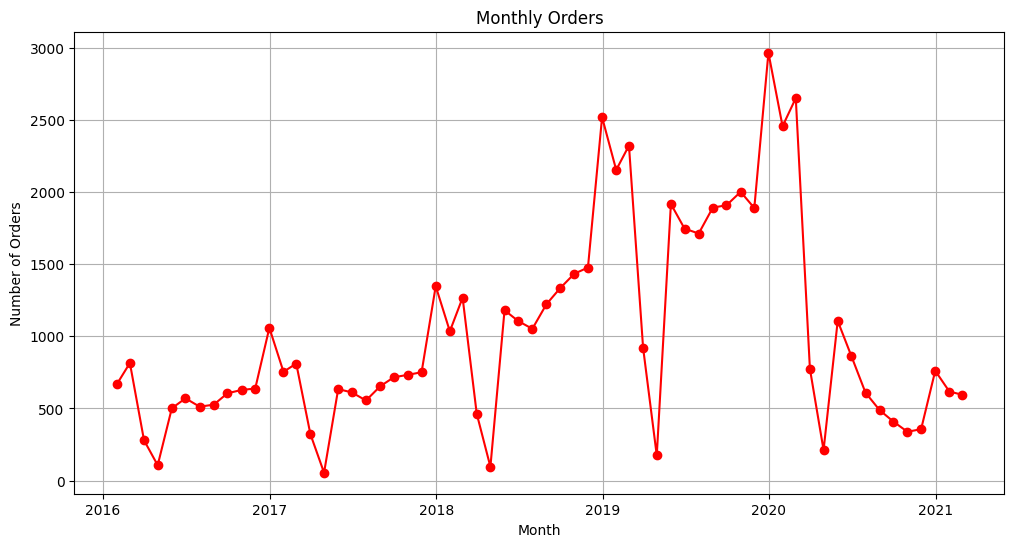

In [51]:
# Make a copy of the original DataFrame for plotting (if needed)
df_org = df.copy()

# Ensure 'Order Date' column is in datetime format (if not already done)
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Resample data to get monthly counts of orders
monthly_orders = df.resample('M', on='Order Date')['Order Number'].count()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders.index, monthly_orders.values, marker='o', linestyle='-',color='red')
plt.title('Monthly Orders')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

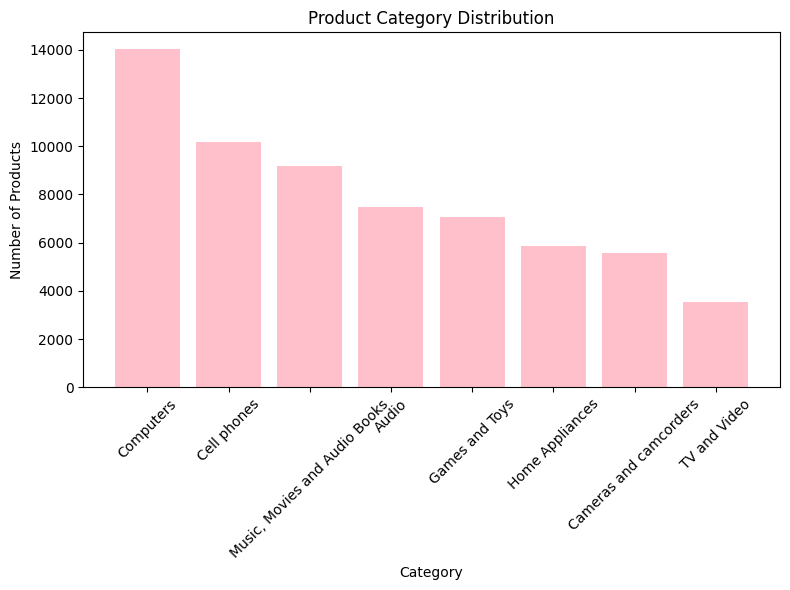

In [52]:
# Calculate product category counts
product_category_counts = df['Category'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(product_category_counts.index, product_category_counts.values,color='pink')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

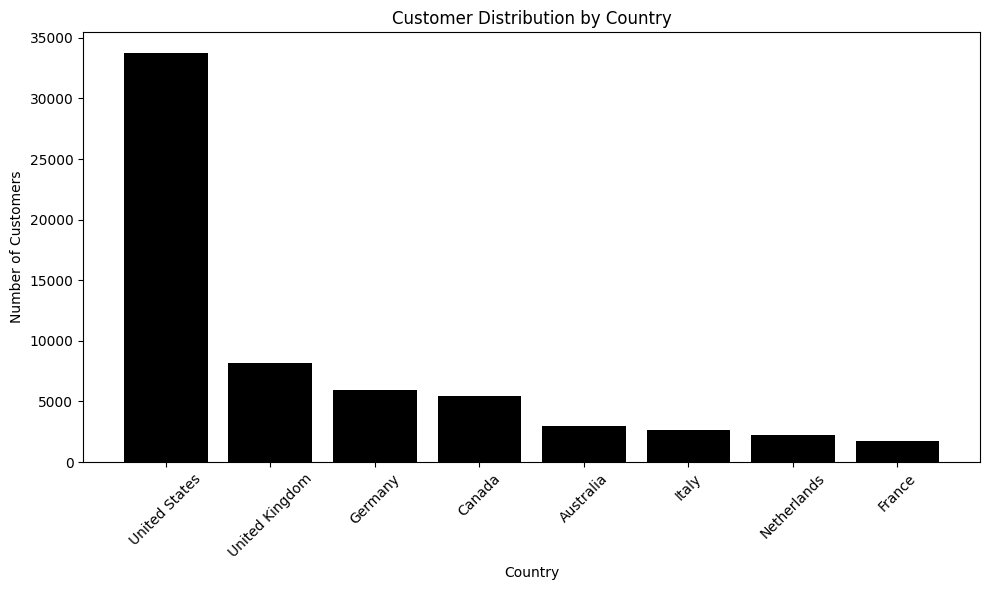

In [53]:
# Grouping by 'Customer Country' and calculating customer counts
customer_geography = df.groupby('Customer Country').size().reset_index(name='Count').sort_values(by='Count', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(customer_geography['Customer Country'], customer_geography['Count'],color='black')
plt.title('Customer Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

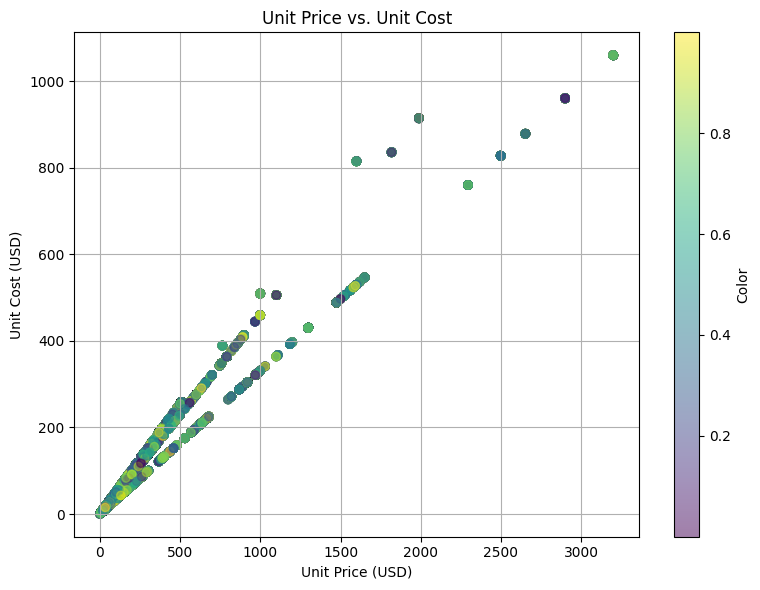

In [54]:
# Generate random colors for each data point
colors = np.random.rand(len(df))

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df['Unit Price USD'], df['Unit Cost USD'], c=colors, alpha=0.5, cmap='viridis')
plt.title('Unit Price vs. Unit Cost')
plt.xlabel('Unit Price (USD)')
plt.ylabel('Unit Cost (USD)')
plt.colorbar(label='Color')  # Adding a colorbar
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\email\AppData\Local\Temp\ipykernel_15660\4173602209.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(weekdays, rotation=45)


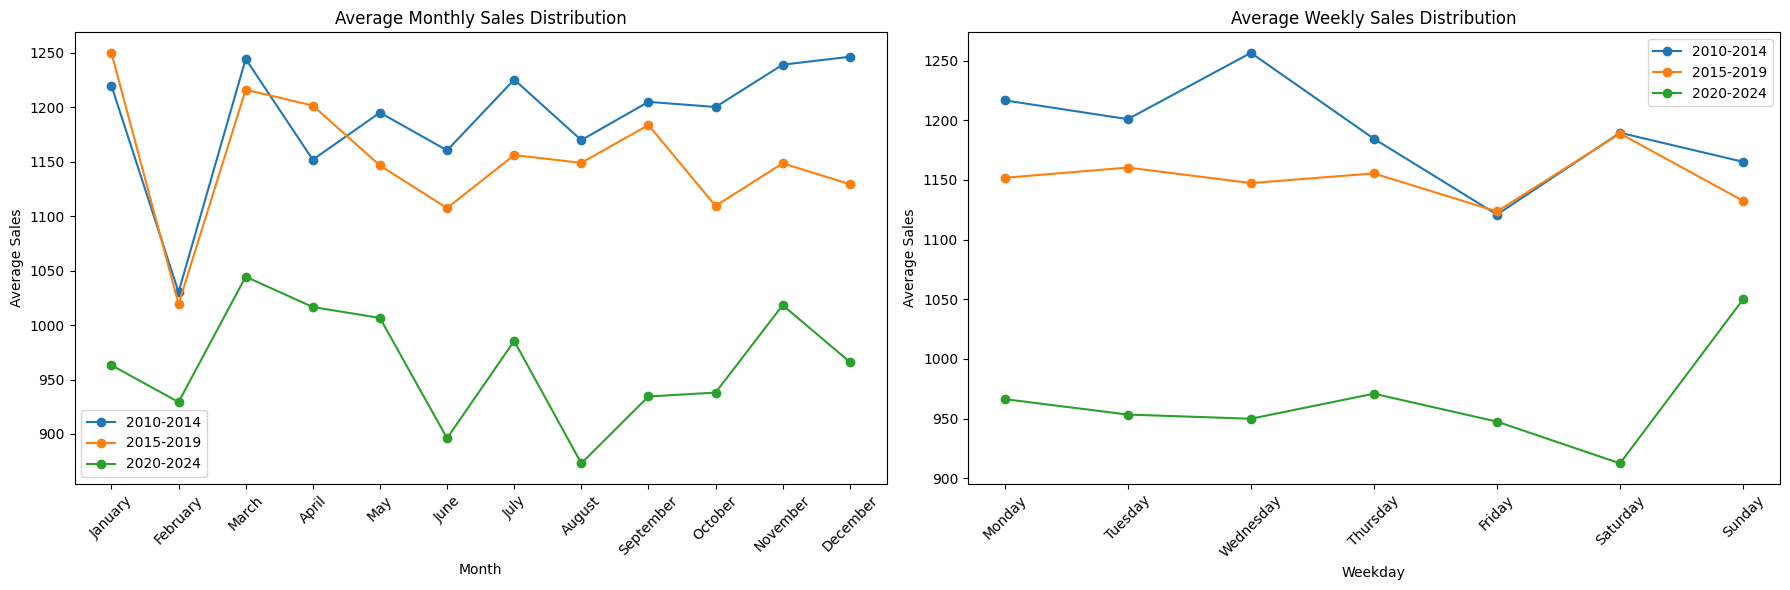

In [55]:
# Sample data generation
np.random.seed(0)
dates = pd.date_range(start='2010-01-01', end='2023-12-31', freq='D')
sales = np.random.randint(10, 100, size=len(dates))
df = pd.DataFrame({'Date': dates, 'Sales': sales})

# Extract month and weekday name
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.day_name()

# Group by 5-year intervals and aggregate sales
df['Year'] = df['Date'].dt.year
df['Year Group'] = df['Year'] // 5 * 5
yearly_sales = df.groupby(['Year Group', 'Month', 'Weekday'])['Sales'].sum().reset_index()

# Create a figure and two separate plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot for average monthly sales distribution
for year_group, group_data in yearly_sales.groupby('Year Group'):
    monthly_sales = group_data.groupby('Month')['Sales'].mean()
    ax1.plot(monthly_sales.index, monthly_sales.values, marker='o', label=f'{year_group}-{year_group+4}')

ax1.set_title('Average Monthly Sales Distribution')
ax1.set_xlabel('Month')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels([pd.Timestamp(f'2020-{month}-01').strftime('%B') for month in range(1, 13)], rotation=45)
ax1.set_ylabel('Average Sales')
ax1.legend()

# Plot for average weekly sales distribution
for year_group, group_data in yearly_sales.groupby('Year Group'):
    weekday_sales = group_data.groupby('Weekday')['Sales'].mean()
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    ax2.plot(weekdays, weekday_sales.values, marker='o', label=f'{year_group}-{year_group+4}')

ax2.set_title('Average Weekly Sales Distribution')
ax2.set_xlabel('Weekday')
ax2.set_ylabel('Average Sales')
ax2.set_xticklabels(weekdays, rotation=45)
ax2.legend()

plt.tight_layout()
plt.show()

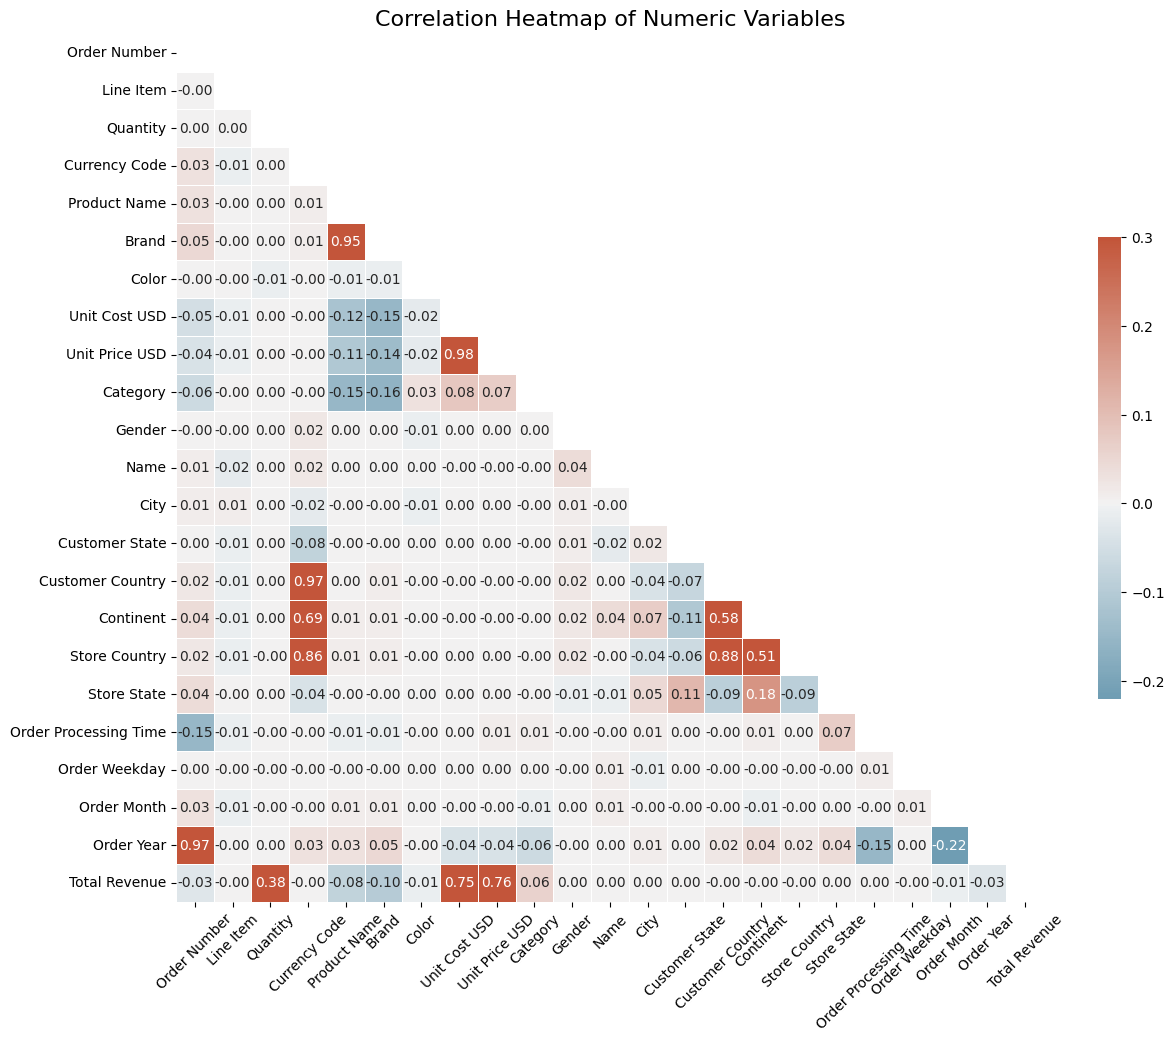

In [56]:
# Assuming df_encoder is your DataFrame containing numeric variables
# Select numeric columns excluding datetime and other non-numeric types
numeric_columns = df_encoder_scaled.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_columns.corr()

# Round the correlation matrix to two decimal points
corr_matrix = corr_matrix.round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))  # Increased figure size

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True, annot_kws={"size": 10, "ha": 'center'},
            fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap of Numeric Variables', fontsize=16)  # Increased title font size
plt.xticks(rotation=45)  # Rotate x-axis tick labels for better readability

plt.show()

In [57]:
#df=df_org.copy()
df = df_encoder.copy()

In [58]:
# Define target and features
target = 'Total Revenue'
# Define columns to keep
columns_to_keep = ['Product Name', 'Category','Quantity',
                   'Order Year', 'Color', 'Unit Cost USD', 'Unit Price USD','Brand']

# Filter DataFrame to keep only the specified columns
df_filtered = df_encoder_scaled[columns_to_keep]
features = df_filtered

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, df_org[target], test_size=0.20, random_state=42)

# Define and train the Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predict on test set
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5
r2_lr = r2_score(y_test, y_pred_lr)

# Print evaluation metrics
print("Linear Regression:")
print(f'RMSE: {rmse_lr:.2f}')
print(f'R²: {r2_lr:.2f}')

Linear Regression:
RMSE: 829.83
R²: 0.72


In [59]:
# Fit Elastic Net model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

# Predict on test set
y_pred = elastic_net.predict(X_test)

# Evaluate the model
mse_en = mean_squared_error(y_test, y_pred_lr)
rmse_en = mse_lr ** 0.5
r2_en = r2_score(y_test, y_pred_lr)

# Print evaluation metrics
print("Elastic Net:")
print(f'RMSE: {rmse_en:.2f}')
print(f'R²: {r2_en:.2f}')

Elastic Net:
RMSE: 829.83
R²: 0.72


In [60]:
# Create a pipeline with preprocessing and Lasso regression model
model_lasso = Lasso(alpha=0.1) # Set alpha parameter as needed

model_lasso.fit(X_train, y_train)

# Predict on test set
y_pred_lasso = model_lasso.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mse_lasso ** 0.5
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print evaluation metrics
print("\nLasso Regression:")
print(f'RMSE: {rmse_lasso:.2f}')
print(f'R²: {r2_lasso:.2f}')



Lasso Regression:
RMSE: 829.80
R²: 0.72


In [61]:
# Create a pipeline with preprocessing and Lasso regression model
model_ridge = Ridge(alpha=1.0)  # Set alpha parameter as needed

model_ridge.fit(X_train, y_train)

# Predict on test set
y_pred_ridge = model_ridge.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mse_ridge ** 0.5
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print evaluation metrics
print("\nRidge Regression:")
print(f'RMSE: {rmse_ridge:.2f}')
print(f'R²: {r2_ridge:.2f}')


Ridge Regression:
RMSE: 829.83
R²: 0.72


In [62]:
import joblib

# Save models
joblib.dump(model_lr, 'D:\\JOBINA\\linear_regression_model.pkl')
joblib.dump(elastic_net, 'D:\\JOBINA\\elastic_net_model.pkl')
joblib.dump(model_lasso, 'D:\\JOBINA\\lasso_model.pkl')
joblib.dump(model_ridge, 'D:\\JOBINA\\ridge_model.pkl')


['D:\\JOBINA\\ridge_model.pkl']